In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import KFold
import pickle
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinayakarora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vinayakarora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vinayakarora/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df_train = pd.read_json("Dataset/train.json")
df_test = pd.read_json("Dataset/test.json")
# df_train = pd.read_json("train.json")
# df_test = pd.read_json("test.json")


df_train.head(20)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


# Preprocessing

In [4]:
df_train.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [5]:
df_test.describe()

,id
count,9944.000000
mean,24894.350362
std,14322.958061
min,5.000000
25%,12541.000000
50%,24731.500000
75%,37113.250000
max,49715.000000


In [6]:
df_train.isna().describe()

,id,cuisine,ingredients
count,39774,39774,39774
unique,1,1,1
top,False,False,False
freq,39774,39774,39774


In [7]:
df_test.isna().describe()

,id,ingredients
count,9944,9944
unique,1,1
top,False,False
freq,9944,9944


In [8]:
df_train.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [9]:
df_test.isna().sum()

id             0
ingredients    0
dtype: int64

Number of Unique Cuisines are:  20


cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

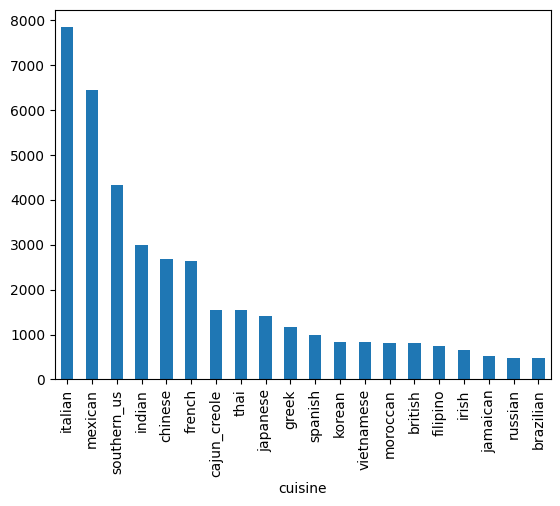

In [10]:
cuisine_freq = df_train["cuisine"].value_counts()

cuisine_freq.plot(kind="bar")
print("Number of Unique Cuisines are: ",len(cuisine_freq))
cuisine_freq


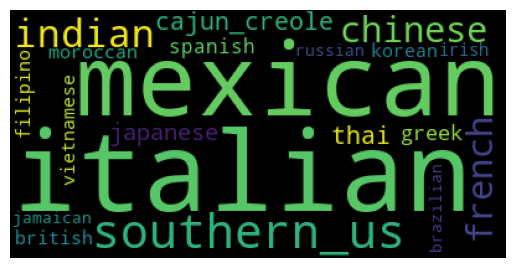

In [11]:
cuisine_freq_dict = cuisine_freq.to_dict()

wordcloud = WordCloud()
cuisine_wordcloud = wordcloud.generate_from_frequencies(cuisine_freq_dict)
plt.axis('off')
plt.imshow(cuisine_wordcloud)

In [12]:
ingredients_df = df_train.explode('ingredients')
ingredients_freq = ingredients_df['ingredients'].value_counts()


print("Number of Unique Ingredients are: ",len(ingredients_freq))
ingredients_freq

Number of Unique Ingredients are:  6714


ingredients
salt                         18049
olive oil                     7972
onions                        7972
water                         7457
garlic                        7380
                             ...  
sauerkraut juice                 1
no-calorie sweetener             1
Bob Evans Italian Sausage        1
extra firm silken tofu           1
crushed cheese crackers          1
Name: count, Length: 6714, dtype: int64

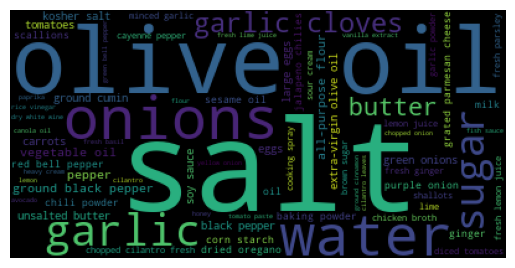

In [13]:
ingredients_freq_dict = ingredients_freq.to_dict()
ingredients_freq_wordcloud=wordcloud.generate_from_frequencies(ingredients_freq_dict)
plt.axis('off')
plt.imshow(ingredients_freq_wordcloud)

In [14]:
ingredients_by_cuisine = ingredients_df.groupby('cuisine')

ingredients_by_cuisine_freq = ingredients_by_cuisine['ingredients'].value_counts()

ingredients_by_cuisine_freq

cuisine     ingredients         
brazilian   salt                    194
            onions                  133
            olive oil               118
            lime                     89
            water                    87
                                   ... 
vietnamese  worcestershire sauce      1
            yam bean                  1
            yellow peppers            1
            yellow squash             1
            yukon gold potatoes       1
Name: count, Length: 29179, dtype: int64

In [15]:

#To do for pre-processing, i think:
#NER: The one from Assignment 1 is missing ingredients: confirm if we need to do NER or no.
#Rank freq all that plots from Assignment 1
#Freq-cuisine stuff from Assignment 2
#Create WordCloud/barplot/any visualisation, to see what ingredients are popular per cuisine - dont know how to use ingredients_by_cuisine_freq for that

Reference - https://medium.com/@awaldeep/understanding-the-essentials-nlp-text-preprocessing-steps-b5d1fd58c11a

In [16]:
def pre_process(ingredient_list):
    stop_words = set(stopwords.words("english"))
    word_lemmatizer = WordNetLemmatizer()
    cooking_words = {"cut","organic","fresh","large","small","diced","chopped","minced","cup","spoon","chop","tablespoon","teaspoon","pinch","boiled","baked","grilled","steamed","sliced","whole","crushed","pureed","roasted","blended","mashed","peeled","shredded","cut","stirred","whisked","seared","toasted","frozen","softened","defrosted","grated","fried","drained","seasoned","marinated","garnished","glazed","caramelized","zested","dressed","broiled","cubed","poured","melted","scrambled","simmered","braised","browned","reduced","cooled","tossed","all-purpose"}
    ingridient_processed = []

    for ingredients in ingredient_list:
        final_ingredient = []
        split_list = word_tokenize(ingredients)
        for ingredient in split_list:

            ingredient = ingredient.lower()
            ingredient = ingredient.strip()
            ingredient = re.sub(r'[^a-zA-Z\s]','',ingredient)
           
            if(ingredient in stop_words or ingredient in cooking_words):
                continue
            else:

                ingredient = word_lemmatizer.lemmatize(ingredient)
                if(ingredient == ""):
                    continue
                final_ingredient.append(ingredient)
        if(len(final_ingredient) > 0):
            ingridient_processed.append(" ".join(final_ingredient))

    return " ".join(ingridient_processed)


In [17]:
df_train["ingredients"] = df_train["ingredients"].map(pre_process)
df_test["ingredients"] = df_test["ingredients"].map(pre_process)

In [18]:
df_train.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olive grape tomato garli...
1,25693,southern_us,plain flour ground pepper salt tomato ground b...
2,20130,filipino,egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallot cornflour cayenne pepper ...


In [19]:
df_test.head()

,id,ingredients
0,18009,baking powder egg allpurpose flour raisin milk...
1,28583,sugar egg yolk corn starch cream tartar banana...
2,41580,sausage link fennel bulb frond olive oil cuban...
3,29752,meat cut file powder smoked sausage okra shrim...
4,35687,ground black pepper salt sausage casing leek p...


In [20]:
X = df_train["ingredients"]
y = df_train["cuisine"]

In [23]:
le = LabelEncoder()
y_tfid = le.fit_transform(y)

tfid = TfidfVectorizer()
X_tfid = tfid.fit_transform(X)

ingridient_list = []
for ingridients in X.to_list():
    ingridient_list.append(ingridients.split(" "))
word2vec =  Word2Vec(ingridient_list,window=2,min_count=1)
X_word2vec = []

for ingridients in X:
    ingridient_list = ingridients.split(" ")

    word2vec_score = []
    for ingredient in ingridient_list:
        if(ingredient not in word2vec.wv):

            continue

        word2vec_score.append(word2vec.wv[ingredient])
    if(word2vec_score == []):
        X_word2vec.append(np.zeros(100))
        continue
    X_word2vec.append(np.mean(word2vec_score,axis=0))

X_word2vec = pd.Series(X_word2vec)

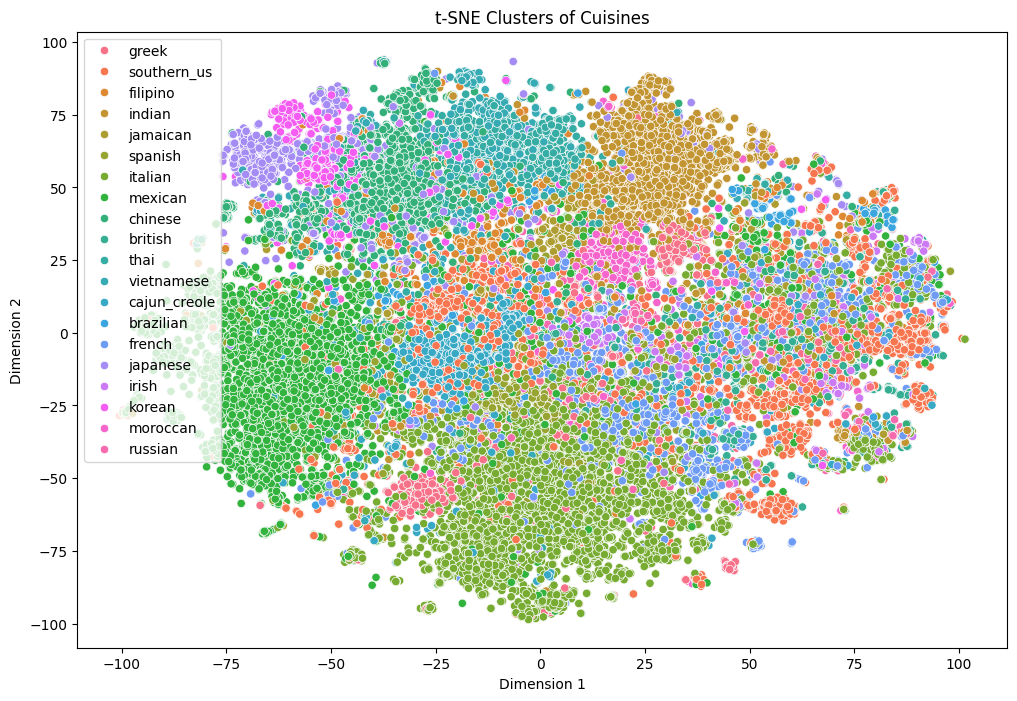

In [24]:
tsne = TSNE(n_components=2, random_state=42,max_iter=1000)
X_tsne = tsne.fit_transform(X_tfid.toarray())

df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1','Dimension 2'])
df_tsne['Cuisine'] = le.inverse_transform(y_tfid)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dimension 1',y='Dimension 2',hue='Cuisine',data=df_tsne)
plt.title('t-SNE Clusters of Cuisines')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [25]:
X_train_tfid,X_test_tfid,y_train_tfid,y_test_tfid = train_test_split(X_tfid,y_tfid,test_size=0.20,random_state=42)
X_train_word2vec,X_test_word2vec,y_train_word2vec,y_test_word2vec = train_test_split(X_word2vec.to_list(),y_tfid,test_size=0.20,random_state=42)

In [26]:
svm_model_tfid = SVC()
svm_model_tfid.fit(X_train_tfid,y_train_tfid)
y_pred = svm_model_tfid.predict(X_test_tfid)
print(f"SVM Accuracy : {accuracy_score(y_test_tfid,y_pred)}")


SVM Accuracy : 0.8021370207416719


In [27]:
svm_model_word2vec = SVC()
svm_model_word2vec.fit(X_train_word2vec,y_train_word2vec)
y_pred = svm_model_word2vec.predict(X_test_word2vec)
print(f"SVM Accuracy : {accuracy_score(y_test_word2vec,y_pred)}")

SVM Accuracy : 0.7296040226272784


In [28]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_tfid.toarray())
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_tfid,test_size=0.20,random_state=42)

In [29]:
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca,y_train_pca)
y_pred = svm_model_pca.predict(X_test_pca)
print(f"SVM Accuracy : {accuracy_score(y_test_pca,y_pred)}")

SVM Accuracy : 0.8021370207416719


In [31]:
adaysn = ADASYN()
smote=SMOTE()
unique_elements, counts = np.unique(y_train_tfid, return_counts=True)
print(f"Before oversampling : {counts}")
X_train_adasyn,y_train_adasyn = adaysn.fit_resample(X_train_tfid,y_train_tfid)
X_train_smote,y_train_smote = smote.fit_resample(X_train_tfid,y_train_tfid)

unique_elements, counts = np.unique(y_train_adasyn, return_counts=True)
print(f"After oversampling : {counts}")

Before oversampling : [ 383  647 1218 2163  619 2096  926 2401  516 6271  435 1139  664 5102
  655  400 3472  807 1224  681]
After oversampling : [6341 6371 6372 6239 6228 6351 6255 6204 6351 6271 6238 6176 6214 5908
 6219 6286 5840 6163 6269 6225]


In [33]:
svm_model_adasyn = SVC()
svm_model_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_pred = svm_model_adasyn.predict(X_test_tfid)
print(f"SVM Accuracy : {accuracy_score(y_test_tfid,y_pred)}")

SVM Accuracy : 0.810936517913262


In [34]:
svm_model_smote = SVC()
svm_model_smote.fit(X_train_smote,y_train_smote)
y_pred = svm_model_smote.predict(X_test_tfid)
print(f"SVM Accuracy : {accuracy_score(y_test_tfid,y_pred)}")

SVM Accuracy : 0.810433689503457


In [35]:
y_pred_tfid = svm_model_tfid.predict(X_test_tfid)
print(classification_report(y_test_tfid,y_pred_tfid))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        84
           1       0.79      0.45      0.57       157
           2       0.83      0.72      0.77       328
           3       0.76      0.88      0.82       510
           4       0.76      0.49      0.59       136
           5       0.62      0.69      0.65       550
           6       0.82      0.69      0.75       249
           7       0.89      0.91      0.90       602
           8       0.72      0.49      0.58       151
           9       0.79      0.91      0.85      1567
          10       0.97      0.68      0.80        91
          11       0.87      0.70      0.78       284
          12       0.88      0.72      0.79       166
          13       0.91      0.94      0.92      1336
          14       0.90      0.78      0.84       166
          15       0.70      0.43      0.53        89
          16       0.71      0.81      0.76       848
          17       0.75    

In [36]:
y_pred_word2vec = svm_model_word2vec.predict(X_test_word2vec)
print(classification_report(y_test_word2vec,y_pred_word2vec))

              precision    recall  f1-score   support

           0       0.73      0.36      0.48        84
           1       0.58      0.20      0.30       157
           2       0.74      0.66      0.70       328
           3       0.68      0.87      0.76       510
           4       0.60      0.37      0.46       136
           5       0.51      0.52      0.52       550
           6       0.78      0.55      0.65       249
           7       0.84      0.88      0.86       602
           8       0.54      0.26      0.36       151
           9       0.73      0.89      0.80      1567
          10       0.76      0.38      0.51        91
          11       0.78      0.55      0.65       284
          12       0.84      0.55      0.67       166
          13       0.88      0.91      0.89      1336
          14       0.78      0.73      0.75       166
          15       0.75      0.24      0.36        89
          16       0.59      0.75      0.66       848
          17       0.65    

In [37]:
y_pred_pca = svm_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca,y_pred_pca))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71        84
           1       0.70      0.46      0.55       157
           2       0.83      0.72      0.77       328
           3       0.76      0.88      0.82       510
           4       0.77      0.53      0.63       136
           5       0.62      0.70      0.66       550
           6       0.82      0.69      0.75       249
           7       0.89      0.90      0.89       602
           8       0.75      0.49      0.59       151
           9       0.80      0.91      0.85      1567
          10       0.95      0.67      0.79        91
          11       0.87      0.70      0.77       284
          12       0.88      0.75      0.81       166
          13       0.91      0.93      0.92      1336
          14       0.90      0.77      0.83       166
          15       0.68      0.43      0.52        89
          16       0.71      0.81      0.76       848
          17       0.75    

In [38]:
y_pred_adasyn = svm_model_adasyn.predict(X_test_tfid)
print(classification_report(y_test_tfid,y_pred_adasyn))

              precision    recall  f1-score   support

           0       0.88      0.63      0.74        84
           1       0.71      0.57      0.63       157
           2       0.81      0.74      0.77       328
           3       0.78      0.87      0.82       510
           4       0.77      0.60      0.67       136
           5       0.63      0.71      0.67       550
           6       0.77      0.74      0.76       249
           7       0.89      0.90      0.89       602
           8       0.67      0.56      0.61       151
           9       0.82      0.90      0.86      1567
          10       0.94      0.75      0.83        91
          11       0.86      0.74      0.80       284
          12       0.88      0.78      0.82       166
          13       0.92      0.93      0.93      1336
          14       0.89      0.79      0.84       166
          15       0.57      0.44      0.50        89
          16       0.75      0.80      0.78       848
          17       0.72    

In [39]:
y_pred_smote = svm_model_smote.predict(X_test_tfid)
print(classification_report(y_test_tfid,y_pred_smote))

              precision    recall  f1-score   support

           0       0.88      0.63      0.74        84
           1       0.69      0.57      0.63       157
           2       0.83      0.74      0.78       328
           3       0.79      0.86      0.82       510
           4       0.75      0.60      0.67       136
           5       0.63      0.70      0.66       550
           6       0.79      0.73      0.76       249
           7       0.89      0.91      0.90       602
           8       0.66      0.55      0.60       151
           9       0.82      0.90      0.86      1567
          10       0.95      0.76      0.84        91
          11       0.86      0.75      0.80       284
          12       0.86      0.77      0.82       166
          13       0.92      0.93      0.93      1336
          14       0.89      0.79      0.83       166
          15       0.57      0.45      0.50        89
          16       0.75      0.80      0.78       848
          17       0.69    

In [40]:
def xgb_classifier(X_train,y_train,X_test,y_test):
    xgb = XGBClassifier()
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_test)
    print(f"XGBoost Accuracy : {accuracy_score(y_test,y_pred)}")
    print(f"Classification Report : {classification_report(y_test,y_pred)}")

In [41]:
def neural_network(X_train,y_train,X_test,y_test,le):
    neural_network_model = Sequential()
    neural_network_model.add(Dense(1280,input_dim=X_train.shape[1],activation="relu"))
    neural_network_model.add(Dropout(0.5))
    neural_network_model.add(Dense(320,activation="relu"))
    neural_network_model.add(Dropout(0.1))
    neural_network_model.add(Dense(80,activation="relu"))
    neural_network_model.add(Dense(len(le.classes_),activation="softmax"))
    neural_network_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

    neural_network_model.fit(X_train.toarray(),y_train,batch_size=32,epochs=50)
    loss, accuracy = neural_network_model.evaluate(X_test.toarray(),y_test)
    print(f"Neural Network Accuracy: {accuracy}")


In [42]:
def random_forest(X_train,y_train,X_test,y_test):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_tfid,y_train_tfid)
    y_pred = rf.predict(X_test)
    print(f"RF Accuracy : {accuracy_score(y_test,y_pred)}")
    print(f"Classification Report : {classification_report(y_test,y_pred)}")

In [43]:
def naive_bayes(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()

    gnb.fit(X_train.toarray(), y_train)

    y_pred = gnb.predict(X_test.toarray())
    y_prob = gnb.predict_proba(X_test.toarray())

    accuracy_gnb = accuracy_score(y_test, y_pred)

    auc_roc_gnb = roc_auc_score(y_test, y_prob, multi_class='ovr')

    print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
    print(f"Naive Bayes AUC-ROC Score: {auc_roc_gnb:.4f}")
    print(f"Classification Report : {classification_report(y_test,y_pred)}")

In [44]:
def decision_tree(X_train,y_train,X_test,y_test):
    dtc = DecisionTreeClassifier(random_state=42)

    dtc.fit(X_train, y_train)

    y_pred = dtc.predict(X_test)
    y_prob = dtc.predict_proba(X_test)

    accuracy_dtc = accuracy_score(y_test, y_pred)
    auc_roc_dtc = roc_auc_score(y_test, y_prob, multi_class='ovr')


    print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")
    print(f"Decision Tree AUC-ROC Score: {auc_roc_dtc:.4f}")
    print(f"Classification Report : {classification_report(y_test,y_pred)}")

In [45]:
def perceptron_model(X_train,y_train,X_test,y_test):
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

    perceptron.fit(X_train, y_train)

    y_pred_perceptron = perceptron.predict(X_test)

    accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

    print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")
    print(f"Classification Report : {classification_report(y_test,y_pred_perceptron)}")

In [46]:
def k_nearest(X_train,y_train,X_test,y_test):
    k = 3
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    y_prob_knn = knn.predict_proba(X_test)


    accuracy = accuracy_score(y_test, y_pred_knn)
    auc_roc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
   
    print(f'Knn Accuracy:{accuracy :.4f}')
    print(f"Knn AUC-ROC Score: {auc_roc_knn:.4f}")
    print(f"Classification Report : {classification_report(y_test,y_pred_knn)}")

In [47]:
def logistic_regression(X_train,y_train,X_test,y_test):
    log_reg = LogisticRegression()

    log_reg.fit(X_train, y_train)

    y_pred_log = log_reg.predict(X_test)
    y_prob_lr = log_reg.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred_log)
    auc_roc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
    print(f'Logistic RegressionAccuracy: {accuracy :.4f}')
    print(f"Logistic Regression AUC-ROC Score: {auc_roc_lr:.4f}")
    print(f"Classification Report : {classification_report(y_test,y_pred_log)}")

In [48]:
def ensemble_learning(X_train,y_train,X_test,y_test):
    clf2 = DecisionTreeClassifier(random_state=42)
    clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
    clf4 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    clf5 = LogisticRegression()
    clf6 = KNeighborsClassifier(n_neighbors=3)
    ensemble = VotingClassifier(
        estimators=[('dtc', clf2), ('rfc', clf3), ('per', clf4),('log_reg',clf5),('knn',clf6)],
        voting='hard'
    )


    ensemble.fit(X_train,y_train)

    y_pred_ensemble = ensemble.predict(X_test)

    accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
    print(f'Ensemble Model Accuracy: {accuracy_ensemble :.4f}')
    print(f"Classification Report : {classification_report(y_test,y_pred_ensemble)}")
    

In [49]:
def mlp_classifier(X_train,y_train,X_test,y_test):
    mlp =  MLPClassifier(random_state=42,max_iter=500)
    mlp.fit(X_train,y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test,y_pred_mlp)

    print(f'MLP Classifier Accuracy: {accuracy_mlp :.4f}')
    print(f"Classification Report : {classification_report(y_test,y_pred_mlp)}")
   

In [50]:
xgb_classifier(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

XGBoost Accuracy : 0.7810182275298554
Classification Report :               precision    recall  f1-score   support

           0       0.93      0.61      0.73        84
           1       0.67      0.42      0.52       157
           2       0.81      0.68      0.74       328
           3       0.78      0.84      0.81       510
           4       0.70      0.54      0.61       136
           5       0.60      0.62      0.61       550
           6       0.76      0.66      0.71       249
           7       0.87      0.88      0.88       602
           8       0.69      0.49      0.57       151
           9       0.77      0.90      0.83      1567
          10       0.95      0.64      0.76        91
          11       0.82      0.72      0.77       284
          12       0.86      0.68      0.76       166
          13       0.90      0.93      0.92      1336
          14       0.87      0.75      0.81       166
          15       0.61      0.40      0.49        89
          16       

In [51]:
xgb_classifier(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

XGBoost Accuracy : 0.7226901319924576
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.44      0.56        84
           1       0.57      0.30      0.39       157
           2       0.75      0.62      0.68       328
           3       0.71      0.84      0.77       510
           4       0.56      0.36      0.44       136
           5       0.51      0.51      0.51       550
           6       0.75      0.54      0.63       249
           7       0.84      0.87      0.85       602
           8       0.57      0.31      0.40       151
           9       0.73      0.88      0.80      1567
          10       0.74      0.37      0.50        91
          11       0.73      0.56      0.63       284
          12       0.72      0.56      0.63       166
          13       0.87      0.90      0.89      1336
          14       0.77      0.67      0.71       166
          15       0.62      0.28      0.39        89
          16       

In [52]:
neural_network(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid,le)

Epoch 1/50
995/995 [==============================] - 24s 23ms/step - loss: 1.0427 - accuracy: 0.6960
Epoch 2/50
995/995 [==============================] - 23s 23ms/step - loss: 0.6639 - accuracy: 0.7994
Epoch 3/50
995/995 [==============================] - 23s 23ms/step - loss: 0.5253 - accuracy: 0.8405
Epoch 4/50
995/995 [==============================] - 24s 24ms/step - loss: 0.4120 - accuracy: 0.8732
Epoch 5/50
995/995 [==============================] - 23s 23ms/step - loss: 0.3251 - accuracy: 0.8975
Epoch 6/50
995/995 [==============================] - 23s 24ms/step - loss: 0.2533 - accuracy: 0.9214
Epoch 7/50
995/995 [==============================] - 25s 25ms/step - loss: 0.2020 - accuracy: 0.9354
Epoch 8/50
995/995 [==============================] - 25s 25ms/step - loss: 0.1641 - accuracy: 0.9463
Epoch 9/50
995/995 [==============================] - 24s 24ms/step - loss: 0.1403 - accuracy: 0.9532
Epoch 10/50
995/995 [==============================] - 25s 25ms/step - loss: 0.123

In [78]:
# neural_network_model_word2vec = Sequential()
# neural_network_model_word2vec.add(Dense(1280,input_dim=100,activation="relu"))
# neural_network_model_word2vec.add(Dropout(0.5))
# neural_network_model_word2vec.add(Dense(320,activation="relu"))
# neural_network_model_word2vec.add(Dropout(0.1))
# neural_network_model_word2vec.add(Dense(80,activation="relu"))
# neural_network_model_word2vec.add(Dense(len(le.classes_),activation="softmax"))
# neural_network_model_word2vec.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# neural_network_model_word2vec.fit(X_train_word2vec,y_train_word2vec,batch_size=32,epochs=50)
# loss, accuracy = neural_network_model_word2vec.evaluate(X_test_word2vec,y_test_word2vec)
# print(f"Neural Network Accuracy: {accuracy}")

In [58]:
random_forest(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

RF Accuracy : 0.7536140791954745
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.55      0.68        84
           1       0.85      0.25      0.39       157
           2       0.84      0.64      0.73       328
           3       0.71      0.88      0.79       510
           4       0.83      0.40      0.54       136
           5       0.59      0.51      0.55       550
           6       0.80      0.53      0.64       249
           7       0.83      0.88      0.86       602
           8       0.71      0.36      0.48       151
           9       0.70      0.93      0.80      1567
          10       0.96      0.51      0.66        91
          11       0.85      0.65      0.74       284
          12       0.94      0.62      0.75       166
          13       0.85      0.93      0.89      1336
          14       0.89      0.65      0.75       166
          15       0.71      0.27      0.39        89
          16       0.65 

In [59]:
naive_bayes(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

Naive Bayes Accuracy: 0.2411
Naive Bayes AUC-ROC Score: 0.7003
Classification Report :               precision    recall  f1-score   support

           0       0.06      0.63      0.11        84
           1       0.16      0.20      0.18       157
           2       0.28      0.43      0.34       328
           3       0.46      0.10      0.16       510
           4       0.15      0.46      0.22       136
           5       0.34      0.14      0.19       550
           6       0.12      0.20      0.15       249
           7       0.76      0.31      0.44       602
           8       0.14      0.32      0.20       151
           9       0.77      0.13      0.22      1567
          10       0.07      0.69      0.12        91
          11       0.50      0.24      0.32       284
          12       0.21      0.80      0.33       166
          13       0.85      0.31      0.45      1336
          14       0.17      0.67      0.27       166
          15       0.07      0.45      0.13     

In [60]:
decision_tree(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

Decision Tree Accuracy: 0.6253
Decision Tree AUC-ROC Score: 0.7451
Classification Report :               precision    recall  f1-score   support

           0       0.45      0.45      0.45        84
           1       0.36      0.30      0.33       157
           2       0.57      0.51      0.54       328
           3       0.66      0.67      0.66       510
           4       0.34      0.34      0.34       136
           5       0.42      0.44      0.43       550
           6       0.53      0.54      0.53       249
           7       0.75      0.71      0.73       602
           8       0.43      0.37      0.40       151
           9       0.73      0.75      0.74      1567
          10       0.46      0.43      0.44        91
          11       0.60      0.60      0.60       284
          12       0.59      0.60      0.60       166
          13       0.82      0.82      0.82      1336
          14       0.54      0.51      0.53       166
          15       0.20      0.19      0.19 

In [61]:
k_nearest(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

Knn Accuracy:0.7203
Knn AUC-ROC Score: 0.8831
Classification Report :               precision    recall  f1-score   support

           0       0.41      0.64      0.50        84
           1       0.42      0.60      0.49       157
           2       0.59      0.71      0.64       328
           3       0.66      0.86      0.75       510
           4       0.47      0.54      0.50       136
           5       0.50      0.61      0.55       550
           6       0.60      0.62      0.61       249
           7       0.82      0.83      0.83       602
           8       0.53      0.48      0.50       151
           9       0.77      0.81      0.79      1567
          10       0.77      0.59      0.67        91
          11       0.79      0.61      0.69       284
          12       0.78      0.72      0.75       166
          13       0.88      0.84      0.86      1336
          14       0.82      0.64      0.72       166
          15       0.77      0.34      0.47        89
          1

In [62]:
perceptron_model(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

Perceptron Accuracy: 0.7243
Classification Report :               precision    recall  f1-score   support

           0       0.64      0.44      0.52        84
           1       0.65      0.38      0.48       157
           2       0.64      0.55      0.59       328
           3       0.77      0.77      0.77       510
           4       0.53      0.57      0.55       136
           5       0.63      0.45      0.53       550
           6       0.65      0.63      0.64       249
           7       0.83      0.85      0.84       602
           8       0.43      0.32      0.37       151
           9       0.82      0.82      0.82      1567
          10       0.49      0.78      0.60        91
          11       0.68      0.72      0.70       284
          12       0.79      0.71      0.75       166
          13       0.83      0.91      0.87      1336
          14       0.72      0.72      0.72       166
          15       0.32      0.46      0.38        89
          16       0.62      

In [63]:
logistic_regression(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

Logistic RegressionAccuracy: 0.7821
Logistic Regression AUC-ROC Score: 0.9763
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.52      0.63        84
           1       0.64      0.37      0.47       157
           2       0.79      0.66      0.72       328
           3       0.76      0.86      0.81       510
           4       0.72      0.52      0.61       136
           5       0.60      0.65      0.63       550
           6       0.78      0.66      0.72       249
           7       0.87      0.90      0.88       602
           8       0.64      0.42      0.51       151
           9       0.79      0.91      0.85      1567
          10       0.92      0.62      0.74        91
          11       0.83      0.71      0.77       284
          12       0.87      0.75      0.81       166
          13       0.90      0.93      0.92      1336
          14       0.85      0.75      0.79       166
          15       0.59      0.39

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
ensemble_learning(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.7957
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.60      0.64        84
           1       0.72      0.55      0.62       157
           2       0.78      0.71      0.74       328
           3       0.73      0.90      0.80       510
           4       0.73      0.57      0.64       136
           5       0.62      0.67      0.65       550
           6       0.75      0.65      0.70       249
           7       0.86      0.91      0.88       602
           8       0.68      0.46      0.55       151
           9       0.79      0.92      0.85      1567
          10       0.88      0.65      0.75        91
          11       0.86      0.69      0.76       284
          12       0.90      0.70      0.79       166
          13       0.90      0.94      0.92      1336
          14       0.90      0.75      0.82       166
          15       0.76      0.38      0.51        89
          16       0.74  

In [65]:
mlp_classifier(X_train_tfid,y_train_tfid,X_test_tfid,y_test_tfid)

MLP Classifier Accuracy: 0.7589
Classification Report :               precision    recall  f1-score   support

           0       0.61      0.64      0.62        84
           1       0.54      0.48      0.51       157
           2       0.70      0.66      0.68       328
           3       0.76      0.79      0.77       510
           4       0.57      0.62      0.59       136
           5       0.61      0.62      0.61       550
           6       0.72      0.68      0.70       249
           7       0.88      0.84      0.86       602
           8       0.56      0.52      0.54       151
           9       0.82      0.85      0.84      1567
          10       0.77      0.75      0.76        91
          11       0.73      0.73      0.73       284
          12       0.77      0.74      0.76       166
          13       0.89      0.91      0.90      1336
          14       0.80      0.71      0.75       166
          15       0.43      0.45      0.44        89
          16       0.72  

In [79]:
# random_forest(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

In [76]:
gnb = GaussianNB()

gnb.fit(X_train_word2vec, y_train_word2vec)

y_pred_nb = gnb.predict(X_test_word2vec)
y_prob_nb = gnb.predict_proba(X_test_word2vec)

accuracy_gnb = accuracy_score(y_test_word2vec, y_pred_nb)

auc_roc_gnb = roc_auc_score(y_test_word2vec, y_prob_nb, multi_class='ovr')

print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Naive Bayes AUC-ROC Score: {auc_roc_gnb:.4f}")
print(f"Classification Report : {classification_report(y_test_word2vec,y_pred_nb)}")

Naive Bayes Accuracy: 0.5209
Naive Bayes AUC-ROC Score: 0.8931
Classification Report :               precision    recall  f1-score   support

           0       0.12      0.37      0.19        84
           1       0.10      0.54      0.17       157
           2       0.34      0.75      0.47       328
           3       0.69      0.62      0.65       510
           4       0.17      0.13      0.15       136
           5       0.39      0.11      0.17       550
           6       0.40      0.54      0.46       249
           7       0.86      0.72      0.78       602
           8       0.41      0.25      0.31       151
           9       0.82      0.60      0.69      1567
          10       0.12      0.26      0.16        91
          11       0.56      0.32      0.41       284
          12       0.33      0.68      0.45       166
          13       0.91      0.78      0.84      1336
          14       0.40      0.76      0.53       166
          15       0.11      0.12      0.12     

In [68]:
decision_tree(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

Decision Tree Accuracy: 0.5135
Decision Tree AUC-ROC Score: 0.6718
Classification Report :               precision    recall  f1-score   support

           0       0.24      0.27      0.25        84
           1       0.17      0.19      0.18       157
           2       0.42      0.41      0.41       328
           3       0.59      0.56      0.58       510
           4       0.18      0.20      0.19       136
           5       0.29      0.29      0.29       550
           6       0.32      0.35      0.34       249
           7       0.68      0.67      0.68       602
           8       0.15      0.16      0.16       151
           9       0.66      0.63      0.65      1567
          10       0.18      0.19      0.18        91
          11       0.38      0.40      0.39       284
          12       0.33      0.32      0.32       166
          13       0.78      0.78      0.78      1336
          14       0.40      0.42      0.41       166
          15       0.09      0.09      0.09 

In [69]:
k_nearest(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

Knn Accuracy:0.6777
Knn AUC-ROC Score: 0.8475
Classification Report :               precision    recall  f1-score   support

           0       0.30      0.54      0.39        84
           1       0.32      0.54      0.40       157
           2       0.51      0.69      0.59       328
           3       0.61      0.84      0.71       510
           4       0.42      0.38      0.40       136
           5       0.42      0.51      0.46       550
           6       0.57      0.52      0.55       249
           7       0.83      0.81      0.82       602
           8       0.45      0.33      0.38       151
           9       0.77      0.79      0.78      1567
          10       0.49      0.41      0.44        91
          11       0.70      0.46      0.56       284
          12       0.65      0.51      0.57       166
          13       0.89      0.86      0.88      1336
          14       0.72      0.60      0.65       166
          15       0.58      0.21      0.31        89
          1

In [70]:
perceptron_model(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

Perceptron Accuracy: 0.5845
Classification Report :               precision    recall  f1-score   support

           0       0.25      0.07      0.11        84
           1       0.31      0.13      0.19       157
           2       0.73      0.24      0.37       328
           3       0.59      0.83      0.69       510
           4       0.41      0.22      0.29       136
           5       0.38      0.33      0.35       550
           6       0.80      0.13      0.23       249
           7       0.54      0.92      0.68       602
           8       0.17      0.08      0.11       151
           9       0.78      0.78      0.78      1567
          10       0.17      0.46      0.24        91
          11       0.83      0.30      0.44       284
          12       0.69      0.11      0.19       166
          13       0.71      0.88      0.79      1336
          14       0.25      0.01      0.01       166
          15       0.18      0.31      0.23        89
          16       0.63      

In [71]:
logistic_regression(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

Logistic RegressionAccuracy: 0.7056
Logistic Regression AUC-ROC Score: 0.9536
Classification Report :               precision    recall  f1-score   support

           0       0.50      0.25      0.33        84
           1       0.40      0.17      0.23       157
           2       0.69      0.59      0.64       328
           3       0.68      0.84      0.75       510
           4       0.61      0.39      0.48       136
           5       0.49      0.47      0.48       550
           6       0.74      0.54      0.63       249
           7       0.84      0.87      0.86       602
           8       0.57      0.25      0.35       151
           9       0.74      0.86      0.80      1567
          10       0.62      0.36      0.46        91
          11       0.68      0.57      0.62       284
          12       0.72      0.57      0.63       166
          13       0.86      0.90      0.88      1336
          14       0.69      0.70      0.69       166
          15       0.61      0.26

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
ensemble_learning(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.7121
Classification Report :               precision    recall  f1-score   support

           0       0.44      0.37      0.40        84
           1       0.41      0.29      0.34       157
           2       0.66      0.63      0.65       328
           3       0.62      0.90      0.73       510
           4       0.59      0.32      0.42       136
           5       0.46      0.52      0.49       550
           6       0.77      0.47      0.58       249
           7       0.80      0.89      0.85       602
           8       0.58      0.25      0.35       151
           9       0.75      0.88      0.81      1567
          10       0.73      0.40      0.51        91
          11       0.81      0.47      0.60       284
          12       0.87      0.40      0.55       166
          13       0.86      0.91      0.89      1336
          14       0.87      0.58      0.70       166
          15       0.69      0.25      0.36        89
          16       0.63  

In [73]:
mlp_classifier(X_train_word2vec,y_train_word2vec,X_test_word2vec,y_test_word2vec)

MLP Classifier Accuracy: 0.7165
Classification Report :               precision    recall  f1-score   support

           0       0.54      0.48      0.51        84
           1       0.46      0.41      0.43       157
           2       0.69      0.66      0.67       328
           3       0.76      0.77      0.76       510
           4       0.53      0.45      0.49       136
           5       0.53      0.50      0.52       550
           6       0.64      0.65      0.64       249
           7       0.84      0.85      0.84       602
           8       0.43      0.37      0.40       151
           9       0.78      0.83      0.80      1567
          10       0.52      0.53      0.52        91
          11       0.64      0.62      0.63       284
          12       0.73      0.59      0.65       166
          13       0.89      0.89      0.89      1336
          14       0.69      0.68      0.68       166
          15       0.31      0.44      0.37        89
          16       0.67  

/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
param_grid = {'C': [0.1,1,10],'gamma': ['scale','auto'],'kernel': ['poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(estimator=SVC(random_state=42),param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found:", grid_search.best_params_)
print(f"Best performance: {grid_search.best_score_} ")

SVM_optimised = grid_search.best_estimator_
SVM_optimised.fit(X_train_smote, y_train_smote)


y_pred_SVM_optimised = SVM_optimised.predict(X_test_tfid)

accuracy_SVM_optimised = accuracy_score(y_test_tfid,y_pred_SVM_optimised)
cv_scores = cross_val_score(SVM_optimised,X_train_smote,y_train_smote, cv=3)
mean_cv_accuracy = cv_scores.mean()

print(f"Optimized SVM Accuracy: {accuracy_SVM_optimised:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=37.8min
[CV] END ....................C=0.1, gamma=auto, kernel=poly; total time=114.0min
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=29.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=21.3min
[CV] END .......................C=1, gamma=auto, kernel=rbf; total time=117.7min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=18.5min
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=15.1min
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=88.8min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=59.4min
[CV] END .................C=0.1, gamma=auto, kernel=sigmoid; total time=115.2min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=21.8min
[CV] END ......................C=1, gamma=auto, 

In [83]:
with open('svm_grid_search_final_model.pkl','wb') as f:
    pickle.dump(SVM_optimised,f)

In [84]:
# X_pipeline = df_train["ingredients"]
# y_pipeline = df_train["cuisine"]

# X_pipeline_train,X_pipeline_test,y_pipeline_train,y_pipeline_test = train_test_split(X_pipeline,y_pipeline,test_size=0.2,random_state=42)
# # adaysn = ADASYN()
# # X_pipeline_adasyn,y_pipeline_adasyn = adaysn.fit_resample(X_pipeline,y_pipeline)
# pipeline = make_pipeline(tfid,SVC())
# pipeline.fit(X_pipeline_train,y_pipeline_train)
# # y_pred_pipeline = pipeline.predict(X_test)
# print(f"Pipeline Accuracy : {pipeline.score(X_pipeline_test,y_pipeline_test)}")

# with open("pipeline.pkl",'wb') as f:
#     pickle.dump(pipeline,f)

In [85]:
# xgb = XGBClassifier()
# xgb.fit(X_train_adasyn,y_train_adasyn)
# y_pred = xgb.predict(X_test)
# print(f"XGBoost Accuracy : {accuracy_score(y_test,y_pred)}")

In [86]:
# param_grid = {'C': [0.1,1,10],
#               'gamma': [0.1,1,10,],
#               'kernel': ['poly', 'rbf', 'sigmoid','linear']}

# grid_search = GridSearchCV(
#     estimator=SVC(random_state=42),
#     param_grid=param_grid,
#     cv=10,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# print("Best parameters found:", grid_search.best_params_)
# print(f"Best performance: {grid_search.best_score_} ")

# SVM_optimised = grid_search.best_estimator_
# SVM_optimised.fit(X_train, y_train)


# y_pred_SVM_optimised = SVM_optimised.predict(X_test)

# accuracy_SVM_optimised = accuracy_score(y_test, y_pred_SVM_optimised)
# cv_scores = cross_val_score(SVM_optimised, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized SVM Accuracy: {accuracy_SVM_optimised:.4f}")
# print(
#     f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

In [87]:
# with open('svm_grid_seacr_model.pkl','wb') as f:
#     pickle.dump(SVM_optimised,f)

In [88]:
# X_pipeline = df_train["ingredients"]
# y_pipeline= df_train["cuisine"]

# y_pipeline = le.transform(y_pipeline)

# X_pipeline_train,X_pipeline_test,y_pipeline_train,y_pipeline_test = train_test_split(X_pipeline,y_pipeline,test_size=0.2,random_state=42)
# pipeline_grid = make_pipeline(tfid,SVC(C=10,gamma=1,kernel="rbf"))
# pipeline_grid.fit(X_pipeline_train,y_pipeline_train)
# y_pred_pipeline = pipeline_grid.predict(X_pipeline_test)
# print(f"Pipeline Accuracy : {accuracy_score(y_pipeline_test,y_pred_pipeline)}")


In [89]:
# with open('pipeline_svm_grid_search.pkl','wb') as f:
#     pickle.dump(pipeline_grid,f)

In [90]:
# print(X_pipeline_train.shape)
# X_nn =  tfid.transform(df_train["ingredients"])
# y_nn = df_train["cuisine"]
# y_nn = le.transform(y_nn)
# X_nn = X_nn.astype("float32")
# X_train_nn,X_test_nn,y_train_nn,y_test_nn = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
# X_train_nn = X_train_nn.reshape(-1,1)
# X_test_nn = X_test_nn.reshape(-1,1)
# X_train_nn = X_train_nn.reshape(-1,1)
# X_test_nn = X_test_nn.reshape(-1,1)

# neural_network_model = Sequential()
# neural_network_model.add(Dense(1280,input_dim=X_train.shape[1],activation="relu"))
# neural_network_model.add(Dropout(0.5))
# neural_network_model.add(Dense(320,activation="relu"))
# neural_network_model.add(Dropout(0.1))
# neural_network_model.add(Dense(80,activation="relu"))
# neural_network_model.add(Dense(len(le.classes_),activation="softmax"))
# neural_network_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# neural_network_model.fit(X_train_nn.toarray(),y_train,batch_size=32,epochs=50)
# loss, accuracy = neural_network_model.evaluate(X_test.toarray(),y_test_nn)
# print(f"Neural Network Accuracy: {accuracy}")


In [91]:
# with open("seq_nn.pkl",'wb') as f:
#     pickle.dump(neural_network_model,f)

In [92]:
# kfold = KFold(n_splits=10,shuffle=True)

In [93]:
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train_smote,y_train_smote)
# y_pred_rf = rf.predict(X_test)
# print(f"RF Accuracy : {accuracy_score(y_test,y_pred_rf)}")

In [94]:
# param_grid = {

#     'n_estimators': [100, 300, 500],
#     'max_depth': [None,25,50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=3,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# print("Best parameters found:", grid_search.best_params_)
# print(f"Best performance: {grid_search.best_score_} ")

# RF_optimised = grid_search.best_estimator_
# RF_optimised.fit(X_train_smote, y_train_smote)


# y_pred_RF_optimised = RF_optimised.predict(X_test)

# accuracy_RF_optimised = accuracy_score(y_test, y_pred_smote_optimised)
# cv_scores = cross_val_score(RF_optimised, X_train_smote, y_train_smote, cv=5)
# mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized RF Accuracy: {accuracy_RF_optimised:.4f}")
# print(
#     f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

In [95]:
# gnb = GaussianNB()

# gnb.fit(X_train.toarray(), y_train)

# y_pred_gnb = gnb.predict(X_test.toarray())
# y_prob_gnb = gnb.predict_proba(X_test.toarray())

# accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# auc_roc_gnb = roc_auc_score(y_test, y_prob_gnb, multi_class='ovr')

# cv_scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()

# print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
# print(f"Naive Bayes AUC-ROC Score: {auc_roc_gnb:.4f}")
# print(f"5-Fold Cross-Validation Accuracy of Naive Bayes: {mean_cv_accuracy:.4f}")

In [96]:
# dtc = DecisionTreeClassifier(random_state=42)

# dtc.fit(X_train, y_train)

# y_pred_dtc = dtc.predict(X_test)
# y_prob_dtc = dtc.predict_proba(X_test)

# accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
# auc_roc_dtc = roc_auc_score(y_test, y_prob_dtc, multi_class='ovr')

# cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()

# print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")
# print(f"Decision Tree AUC-ROC Score: {auc_roc_dtc:.4f}")
# print(
#     f"5-Fold Cross-Validation Accuracy of Decision Tree: {mean_cv_accuracy:.4f}")

In [97]:
# perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# perceptron.fit(X_train, y_train)

# y_pred_perceptron = perceptron.predict(X_test)

# accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)


# cv_scores = cross_val_score(perceptron, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()

# print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")
# print(f"5-Fold Cross-Validation Accuracy of Perceptron: {mean_cv_accuracy:.4f}")

In [98]:
# k = 3
# knn = KNeighborsClassifier(n_neighbors=k)

# knn.fit(X_train, y_train)

# y_pred_knn = knn.predict(X_test)
# y_prob_knn = knn.predict_proba(X_test)


# accuracy = accuracy_score(y_test, y_pred_knn)
# auc_roc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
# cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()
# print(f"Knn AUC-ROC Score: {auc_roc_knn:.4f}")
# print(f"5-Fold Cross-Validation Accuracy of Knn: {mean_cv_accuracy:.4f}")
# print(f'Knn Accuracy:{accuracy :.4f}')

In [99]:
# log_reg = LogisticRegression()

# log_reg.fit(X_train, y_train)

# y_pred_log = log_reg.predict(X_test)
# y_prob_lr = log_reg.predict_proba(X_test)

# accuracy = accuracy_score(y_test, y_pred_log)
# auc_roc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
# cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()
# print(f"Logistic Regression AUC-ROC Score: {auc_roc_lr:.4f}")
# print(f'Logistic RegressionAccuracy: {accuracy :.4f}')
# print(
#     f"5-Fold Cross-Validation Accuracy of Logistic Regression: {mean_cv_accuracy:.4f}")

In [100]:
# clf2 = DecisionTreeClassifier(random_state=42)
# clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
# clf4 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# clf5 = LogisticRegression()
# clf6 = KNeighborsClassifier(n_neighbors=3)
# ensemble = VotingClassifier(
#     estimators=[('dtc', clf2), ('rfc', clf3), ('per', clf4),('log_reg',clf5),('knn',clf6)],
#     voting='hard'
# )


# ensemble.fit(X_train, y_train)

# y_pred_ensemble = ensemble.predict(X_test)

# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

# cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_scores.mean()


# print(f'Ensemble Model Accuracy: {accuracy_ensemble :.4f}')
# print(f"5-Fold Cross-Validation Accuracy of Ensemble Model: {mean_cv_accuracy:.4f}")

In [101]:
# mlp =  MLPClassifier(random_state=42,max_iter=500)
# mlp.fit(X_train,y_train)
# y_pred_mlp = mlp.predict(X_test)
# accuracy_mlp = accuracy_score(y_test,y_pred_mlp)

# cv_scores = cross_val_score(mlp,X_train,y_train,cv=10)
# mean_cv_accuracy = cv_scores.mean()


# print(f'MLP Classifier Accuracy: {accuracy_mlp :.4f}')
# print(f"5-Fold Cross-Validation Accuracy of Ensemble Model: {mean_cv_accuracy:.4f}")